In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from math import sqrt

In [2]:
df=pd.read_csv(r"C:\Users\jakku\Desktop\Pubgdata.csv")

In [3]:
df

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [4]:
df.shape

(1111742, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

## Dropping Unnamed:0 column

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


* Here we dropped Unnamed:0 Column from the dataset.Because there is no title for the Column.

* So we can dropped the column

# Checking Missing Values

In [8]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

* Here we found only one missing value in winPlacePerc.
* So we can impute with mean,Because of winPlacePerc is continuous data.

In [9]:
mean=round(np.mean(df.winPlacePerc))
df.winPlacePerc.fillna(mean,inplace=True)

In [10]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

***After Filling Data Thier is no loss of Data***

In [11]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727864e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073773e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


## EXPLORATORY DATA ANALYSIS

### Checking how many types of versions in Pubg

In [12]:
match_types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
match_types.columns = ["Type","Count"]
match_types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


* The above frame shows,In Pubg how many types of matches are avaialble.and how many types of matches they played in Pubg with different types.

### Checking how many matches in our data set

In [13]:
number_of_matches = df.loc[:,"matchId"].nunique()
number_of_matches

47951

* There are 47951 matches in our dataset


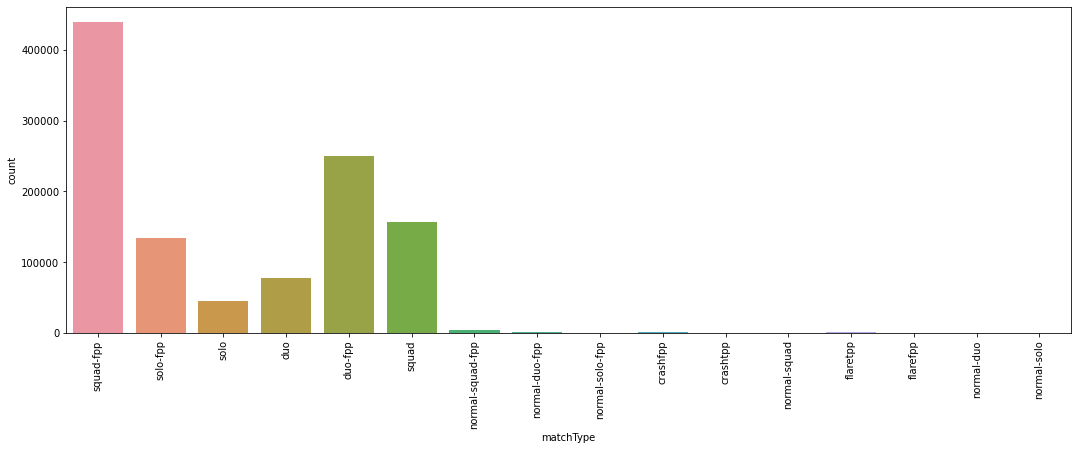

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(x='matchType',data=df)
plt.xticks(rotation=90)
plt.show()

* The graph above shows that the most popular game modes are squad and duo. Next I will aggregate all these individual types into three main categories (squad, duo and solo).

In [15]:
match_types1 = df.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = match_types1.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = match_types1.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = match_types1.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
matchType= pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
matchType

,count
squad,599775
duo,329414
solo,180073


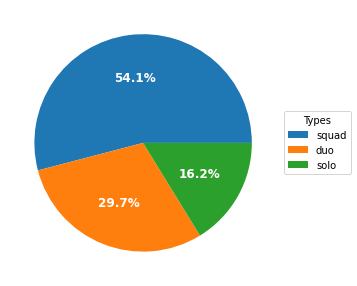

In [16]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']
wedges, texts, autotexts = ax1.pie(matchType["count"],textprops=dict(color="w"), autopct='%1.1f%%')
ax1.legend(wedges, labels,title="Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold")
plt.show()

* the above pie chart shows that 54% of all the matches were played in squad mode

C:\Users\jakku\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


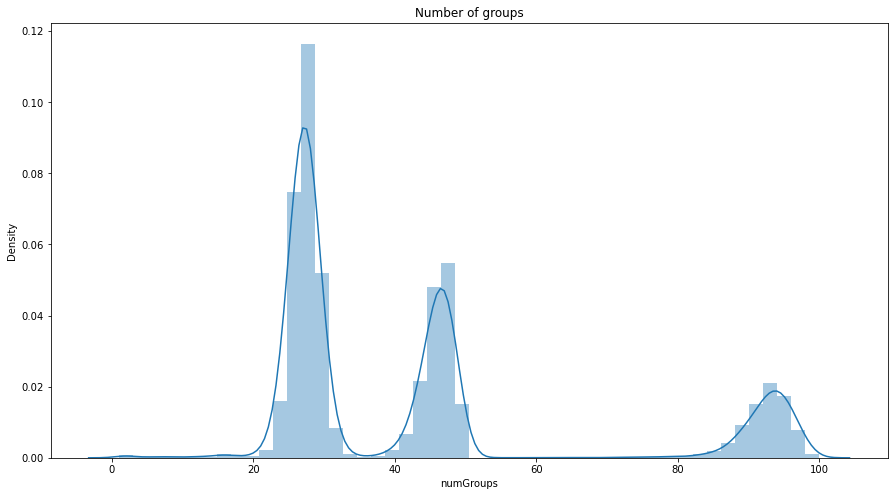

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(df['numGroups'])
plt.title('Number of groups')
plt.show()

* The above graph allows to clearly says distribution three spikes referring to squad games, duo games and solo games.

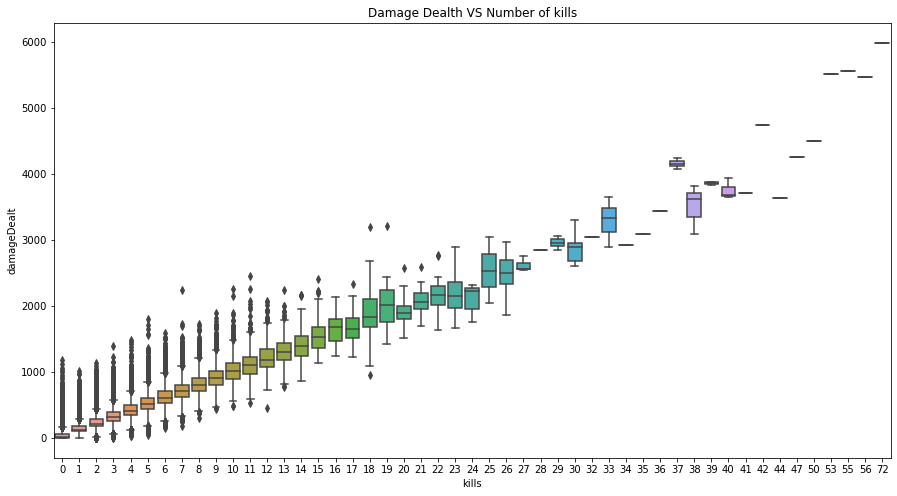

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='kills',y='damageDealt',data=df)
plt.title('Damage Dealth VS Number of kills')
plt.show()

* There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers, more in the lower range. As the number of kills increases number of outliers reduces. The maximum kills is 72.

In [19]:
df[df['kills']>50][["Id","assists","damageDealt","headshotKills","kills","longestKill"]]

,Id,assists,damageDealt,headshotKills,kills,longestKill
349163,97047ef60af1e7,11,5520.0,8,53,39.20
697393,1f6ceaa5140fb6,15,5468.0,13,56,79.06
758017,06308c988bf0c2,7,5990.0,64,72,78.23
1036315,2ade4369bccd12,12,5557.0,7,55,74.79


C:\Users\jakku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Maximum number of headshots that the player scored: 64


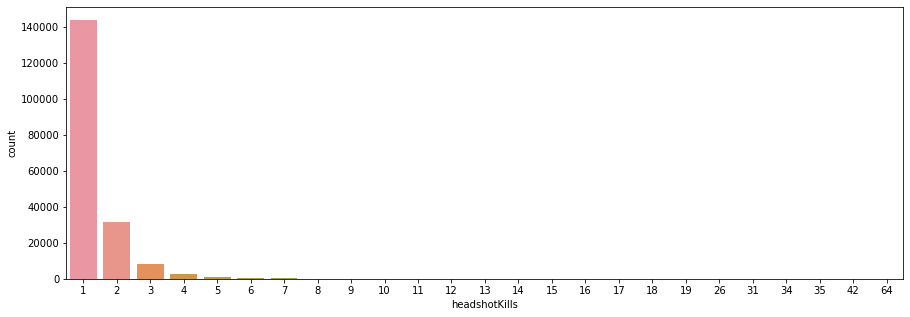

In [20]:
headshots = df[df['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(df["headshotKills"].max()))

C:\Users\jakku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Mean number of DBNOs that the player scored: 0.6573611503388376


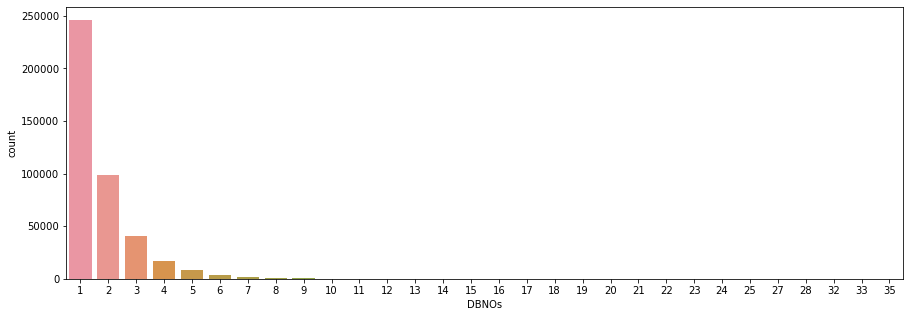

In [21]:
headshots = df[df['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(df["DBNOs"].mean()))


In [22]:
#sns.barplot(x="revives",y="groupId",data=df)

### Now lets try to find if there is any correlation between kills and DBNOs

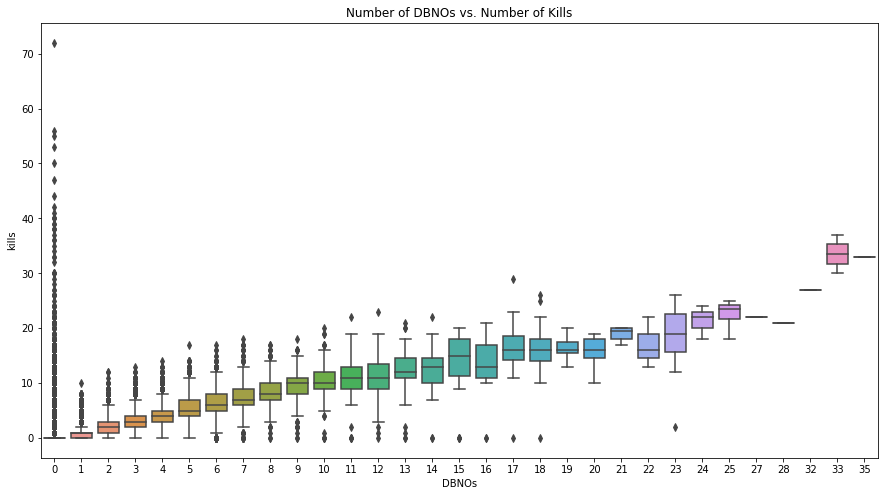

In [23]:
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = df)
ax2.set_title("Number of DBNOs vs. Number of Kills")
plt.show()

* It seems that DBNOs are correlated with kills. That makes sense as usually if player is not killed by headshoot you have to finish him while he's in DBNO state. Interesting is the first observation in the plot - apparently there is a number of players who scored a kill without DBNOs - this is usually a headshot or a vechicle explosion

### MAXIMUM DISTANCE

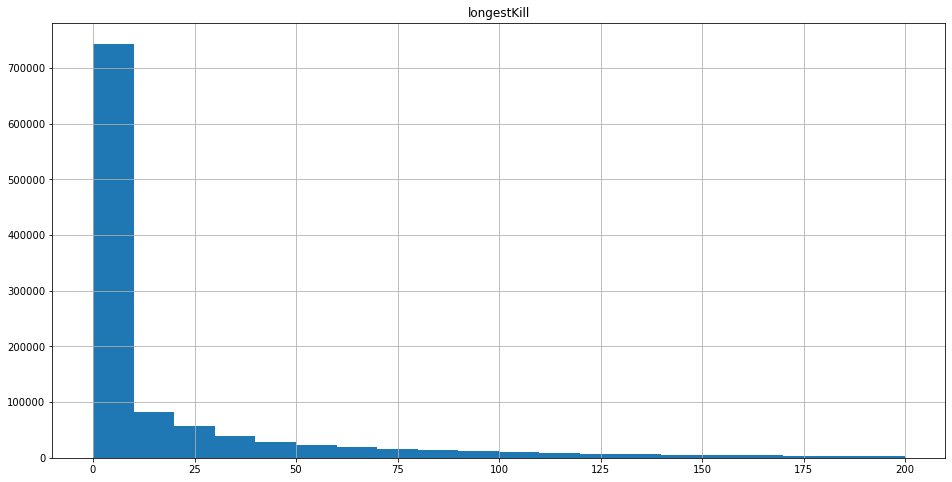

In [24]:
dist = df[df['longestKill']<200]
dist.hist('longestKill', bins=20, figsize = (16,8))
plt.show()

In [25]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(df['longestKill'].mean(),df['longestKill'].quantile(0.95),df['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 125.9m and a maximum distance is 1040.0m.


In [26]:
walk = df["walkDistance"] == 0
print('number of players didnot walk at all:',walk.sum())

number of players didnot walk at all: 24936


In [27]:
ride = df["rideDistance"] == 0
print('number of players who didnot ride at all:',ride.sum())

number of players who didnot ride at all: 827573


In [28]:
swim=df['swimDistance']==0
print('number of players who dint swim at all',swim.sum())

number of players who dint swim at all 1039125


In [29]:
winPlacePerc=df['winPlacePerc']==0
print('average win percentage',winPlacePerc.sum()/len(winPlacePerc))

average win percentage 0.04980472087948463


### Now lets create the sum of walking,swimming and driving distances

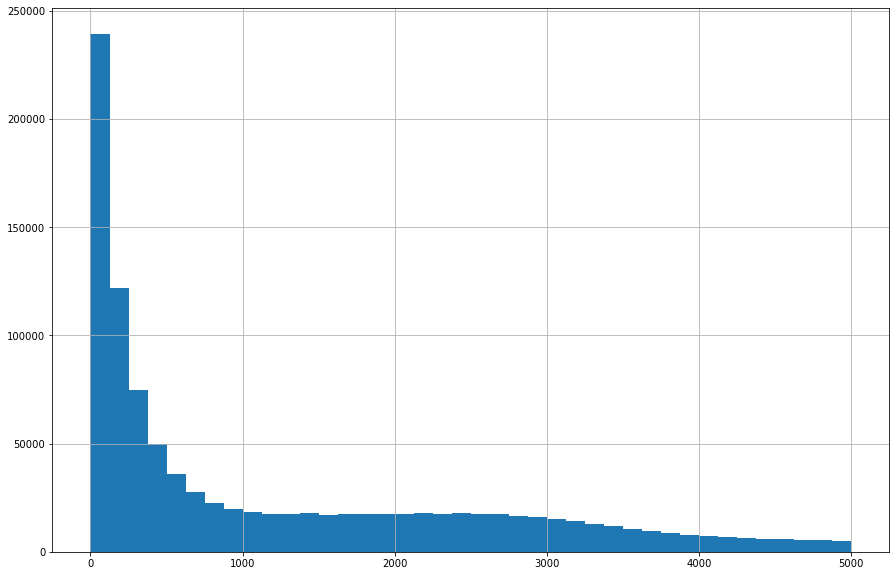

In [30]:
travel_dist = df["walkDistance"] + df["rideDistance"] + df["swimDistance"]
df.drop(columns=['walkDistance','swimDistance','rideDistance'],axis=1,inplace=True)
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))
plt.show()

In [31]:
travel_dist

0           151.300
1          1918.000
2          4908.000
3            38.810
4          2639.400
             ...   
1111736      31.010
1111737     799.800
1111738    4326.000
1111739      60.450
1111741    4435.812
Length: 1009783, dtype: float64

In [32]:
#Here  we collect all the medicine that user taked into one feature 
df['medicine']=df['boosts']+df['heals']

df.drop(columns=['boosts','heals'],axis=1,inplace=True)

In [33]:
df.drop(columns=['Id','groupId','matchId','rankPoints','matchType'],inplace=True)

### NOW LETS ANALYSE THE TOP 10 PLAYERS IN THE GIVEN DATASET

In [34]:
top10 = df[df["winPlacePerc"]>0.9]
print("TOP 10 overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10 overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


In [35]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters."
      .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 74.937 meters, and the best score is 1040.0 meters.


### Effect of Killing on Winning Percentage

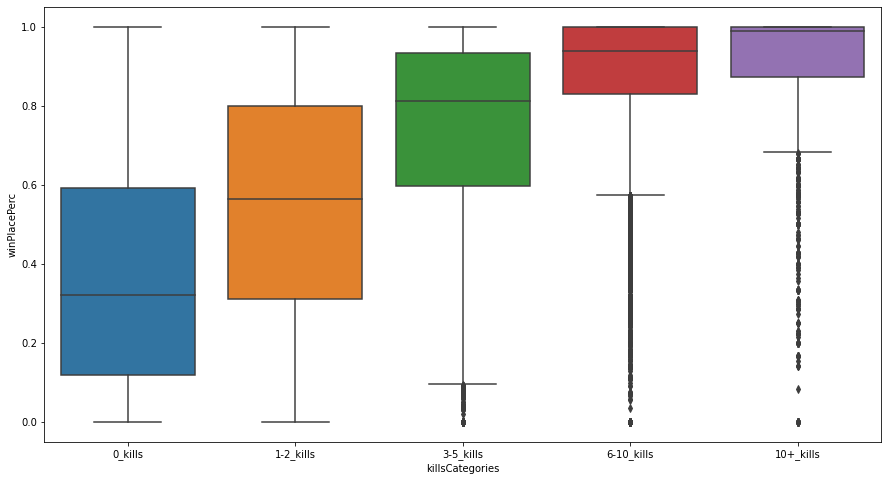

In [36]:
kills = df.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

### Checking Outliers and Outliers Treatment

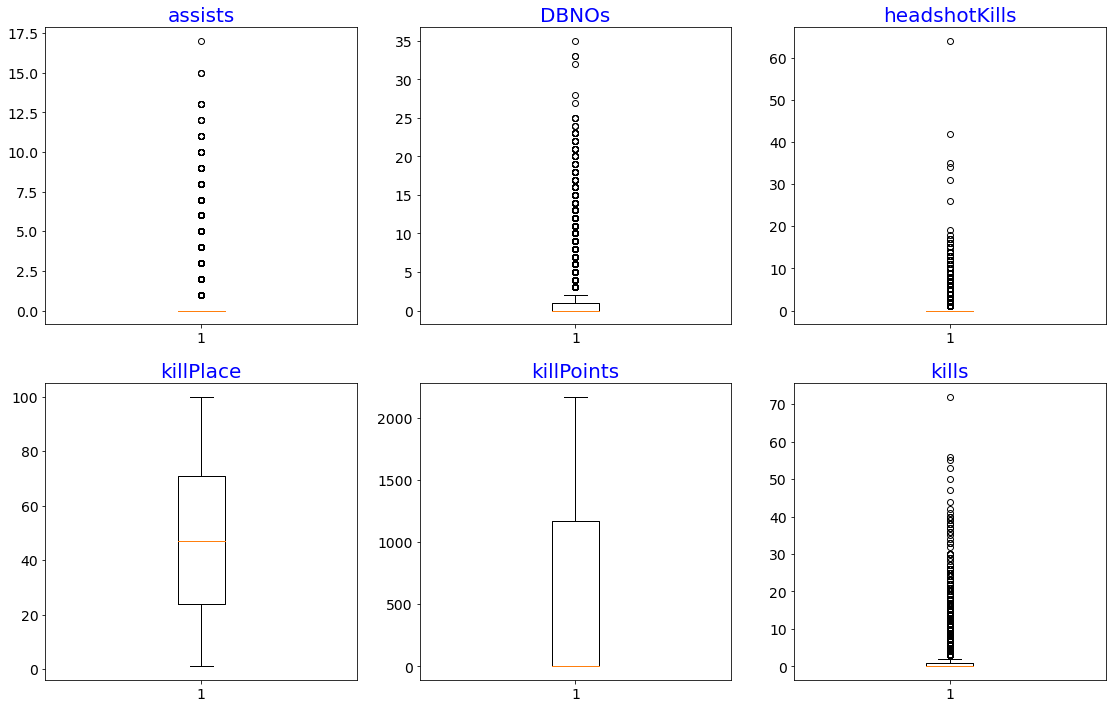

In [37]:
plt.figure(figsize=(19,12))


num_features = df.select_dtypes(include=['int64']).columns
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

In [38]:
from scipy.stats.mstats import winsorize
df["assists"]           = winsorize(df["assists"],(0,0.18))
df["killPoints"]        = winsorize(df["killPoints"],(0,0.090))
df["DBNOs"]  = winsorize(df["DBNOs"],(0,0.090))
df["headshotKills"]  = winsorize(df["headshotKills"],(0,0.17))
df["kills"]  = winsorize(df["kills"],(0,0.15))
df["killPlace"]= winsorize(df["killPlace"],(0.,0.090))

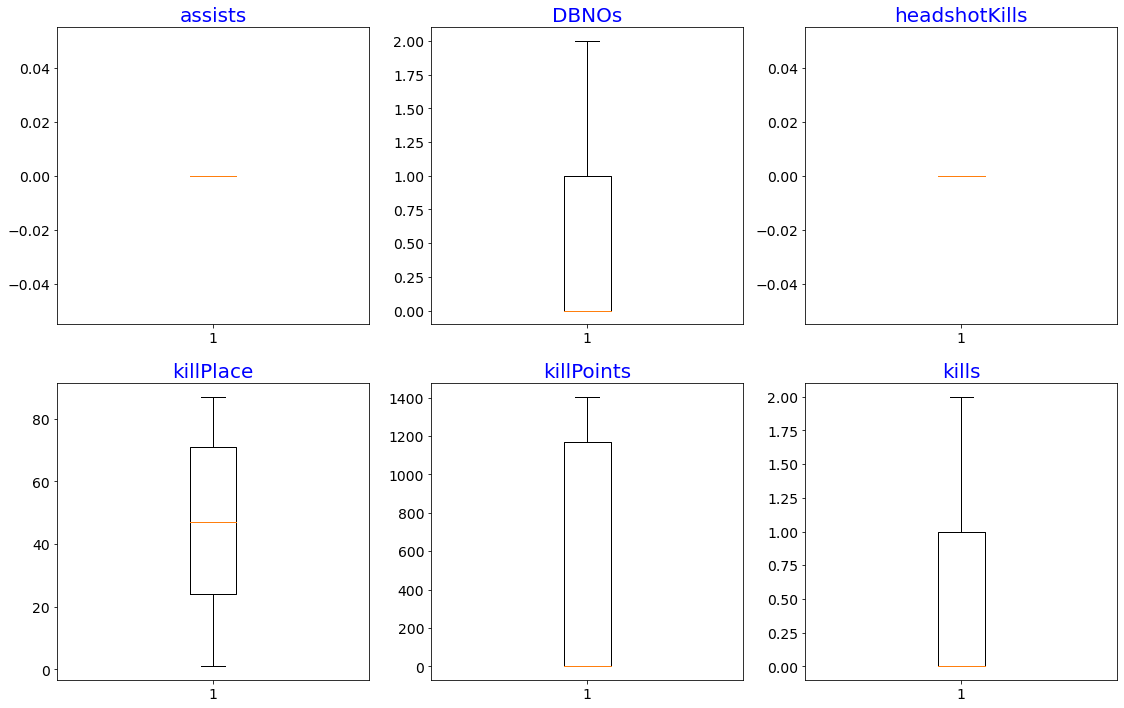

In [39]:
plt.figure(figsize=(19,12))


num_features = df.select_dtypes(include=['int64']).columns
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_features[i]])
    plt.title(num_features[i],color="b",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

* There are some of the outliers we found in the assists,boosts,DBNOs....etc
* We treated outliers using winsorize method.

# Hypothesis Testing

####  Creating a t_score function for sampling distribution 

In [44]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sqrt(sample_size)
    return numerator / denomenator

**1.In pubg Game ,if the person have more than 10 kills he had more chances to win this game approximatly 0.8000 chances to win this game.what is average of kills of the person.when the person have average kills if the person win the game or not?**

In [45]:
kills = [1,2,5,11,7,6,12,2,8,10,10,0,1,5,8,11,13,12,4,2,5,4,4,3,1,0,0,8,9,6]
sum(kills)/len(kills)

5.666666666666667

In [46]:
sample_std = np.std(kills)
sample_std

3.9860869143671325

### Performing the one tail test to calculate the t- critical value

In [47]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 29)

print(t_critical)

1.6991270265334972


### Taking the sample distribution from the  mean sample

In [48]:
sample_size = 30
sample_mean = 5.66
pop_mean = 10
sample_std = 3.986

In [49]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-5.963662567918768


### Visualizing the sample rejection regions by plotting the graphs

Text(5.66, 0.1, 'x_bar')

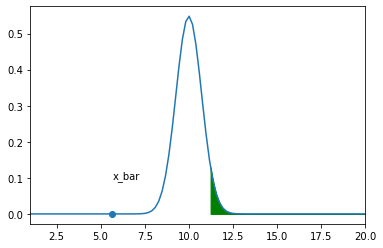

In [50]:
x_min = 1
x_max = 20

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
#plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [51]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [52]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.2332290744154761e-09
Reject Null Hypothesis


#  Model Building

In [53]:
#### Independent And Dependent features
x=df.drop(["winPlacePerc"], axis=1)
y=df['winPlacePerc']

In [54]:
#x = x[:20000]
#y = y[:20000]

In [55]:
x.shape,y.shape

((1111742, 19), (1111742,))

## Linear Regression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score #works
import sklearn.metrics as metrics

In [57]:
#### Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [58]:
model_lr = LinearRegression()

model_lr.fit(X_train,Y_train)

LinearRegression()

In [59]:
accu = cross_val_score(estimator=model_lr,X=X_train,y=Y_train,cv=5,verbose=1)
y_pred = model_lr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


In [60]:
def metric_scores(model,X_test,Y_test,y_pred):
    score = model.score(X_test,Y_test)
    mse = mean_squared_error(Y_test,y_pred)
    mae = mean_absolute_error(Y_test,y_pred)
    #rmse = mse**0.5
    rmse = mean_squared_error(Y_test,y_pred)**0.5
    r2 = r2_score(Y_test,y_pred)


    print(f'Score : {score}\nMSE : {mse}\nMAE : {mae}\nRMSE : {rmse}\nR2 : {r2}')

In [61]:
metric_scores(model_lr,X_test,Y_test,y_pred)

Score : 0.776677303470807
MSE : 0.021065600185131404
MAE : 0.10491851496304606
RMSE : 0.14513993311673876
R2 : 0.776677303470807


* In linear Regression Analysis Accuracy Score is 0.776677.
* Root mean square error is 0.14513

## RandomForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,Y_train)
y_pred = model_rf.predict(X_test)
r2_score(Y_test,y_pred)

0.8809979250090916

In [64]:
metric_scores(model_rf,X_test,Y_test,y_pred)

Score : 0.8809979250090916
MSE : 0.011225236717629383
MAE : 0.07547533892385717
RMSE : 0.10594921763575879
R2 : 0.8809979250090916


* The accuracy score is 0.88099.RandomForestRegressor is the best model compare to linear regression.
* The RMSE also less compare to linear regression.

## GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,20,50,100,200,300]}

In [67]:
model_rf = RandomForestRegressor()

In [68]:
grid = GridSearchCV(estimator=model_rf,param_grid=param,n_jobs=-1,cv=3)

In [69]:
grid.fit(x,y)

KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)

## GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
model_gbr.fit(X_train,Y_train)
accuracies = cross_val_score(estimator=model_gbr,X=X_train,y=Y_train,cv=5,verbose=1)
y_pred = model_gbr.predict(X_test)
print(accuracies)
metric_scores,(model_gbr,X_test,Y_test,y_pred)

      Iter       Train Loss   Remaining Time 
         1           0.0861            2.09m
         2           0.0793            2.04m
         3           0.0735            2.02m
         4           0.0683            1.99m
         5           0.0641            1.96m
         6           0.0602            1.94m
         7           0.0568            1.91m
         8           0.0539            1.88m
         9           0.0513            1.86m
        10           0.0490            1.84m
        20           0.0360            1.64m
        30           0.0315            1.43m
        40           0.0295            1.22m
        50           0.0285            1.02m
        60           0.0277           48.80s
        70           0.0270           36.65s
        80           0.0263           24.44s
        90           0.0257           12.21s
       100           0.0252            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1           0.0862            1.57m
         2           0.0793            1.54m
         3           0.0735            1.54m
         4           0.0684            1.52m
         5           0.0641            1.51m
         6           0.0603            1.50m
         7           0.0569            1.49m
         8           0.0539            1.47m
         9           0.0513            1.45m
        10           0.0490            1.43m
        20           0.0360            1.29m
        30           0.0315            1.12m
        40           0.0295           57.62s
        50           0.0285           47.96s
        60           0.0277           38.36s
        70           0.0270           28.82s
        80           0.0263           19.20s
        90           0.0257            9.61s
       100           0.0252            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0861            1.62m
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.1min finished


[0.73301416 0.73269475 0.73482779 0.73357548 0.73432377]


(<function __main__.metric_scores(model, X_test, Y_test, y_pred)>,
 (GradientBoostingRegressor(max_depth=1, random_state=0, verbose=1),
           assists  damageDealt  DBNOs  headshotKills  killPlace  killPoints  \
  541348         0        211.9      2              0         43           0   
  926404         0        100.0      1              0         37           0   
  869093         0        290.5      1              0         19           0   
  548326         0          0.0      0              0         87           0   
  679628         0          0.0      0              0         69           0   
  ...          ...          ...    ...            ...        ...         ...   
  669323         0        102.3      0              0         67           0   
  600871         0        100.0      0              0         27           0   
  450183         0        452.3      1              0         11        1404   
  1092293        0          0.0      0              0         87

## ANN

In [72]:
from sklearn.neural_network import MLPRegressor
import keras
from keras import models
from keras.layers import Dense,Dropout,Input,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers

In [76]:
def build_model():
        model=Sequential()
        model.add(Dense(512,kernel_initializer="he_normal",input_dim=X_train.shape[1],activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(256,kernel_initializer="he_normal",activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(128,kernel_initializer="he_normal",activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
        model.add(Dense(1,kernel_initializer="normal",activation="sigmoid"))
        optim=optimizers.Adam(lr=0.01,epsilon=1e-8,decay=1e-4,amsgrad=False)
        model.compile(optimizer=optim,loss="mse",metrics=["mae"])
        model.summary
        history=model.fit(X_train,Y_train,epochs=10,batch_size=128)
        return model

In [77]:
Model=build_model()

C:\Users\jakku\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
6949/6949 [==============================] - 75s 10ms/step - loss: 0.0191 - mae: 0.1019
Epoch 2/10
6949/6949 [==============================] - 70s 10ms/step - loss: 0.0148 - mae: 0.0896
Epoch 3/10
6949/6949 [==============================] - 70s 10ms/step - loss: 0.0140 - mae: 0.0869
Epoch 4/10
6949/6949 [==============================] - 70s 10ms/step - loss: 0.0136 - mae: 0.0855
Epoch 5/10
6949/6949 [==============================] - 69s 10ms/step - loss: 0.0136 - mae: 0.0852
Epoch 6/10
6949/6949 [==============================] - 70s 10ms/step - loss: 0.0135 - mae: 0.0853
Epoch 7/10
6949/6949 [==============================] - 69s 10ms/step - loss: 0.0133 - mae: 0.0842
Epoch 8/10
6949/6949 [==============================] - 69s 10ms/step - loss: 0.0131 - mae: 0.0838
Epoch 9/10
6949/6949 [==============================] - 70s 10ms/step - loss: 0.0130 - mae: 0.0835
Epoch 10/10
6949/6949 [==============================] - 69s 10ms/step - loss: 0.0129 - mae: 0.0831


In [79]:
history1=Model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test), batch_size=256)

Epoch 1/10
3475/3475 [==============================] - 49s 14ms/step - loss: 0.0124 - mae: 0.0811 - val_loss: 0.0116 - val_mae: 0.0777
Epoch 2/10
3475/3475 [==============================] - 46s 13ms/step - loss: 0.0123 - mae: 0.0807 - val_loss: 0.0119 - val_mae: 0.0800
Epoch 3/10
3475/3475 [==============================] - 46s 13ms/step - loss: 0.0123 - mae: 0.0805 - val_loss: 0.0117 - val_mae: 0.0790
Epoch 4/10
3475/3475 [==============================] - 47s 14ms/step - loss: 0.0122 - mae: 0.0804 - val_loss: 0.0116 - val_mae: 0.0780: 0.0122 - mae: 0.0
Epoch 5/10
3475/3475 [==============================] - 48s 14ms/step - loss: 0.0122 - mae: 0.0803 - val_loss: 0.0119 - val_mae: 0.0784
Epoch 6/10
3475/3475 [==============================] - 46s 13ms/step - loss: 0.0122 - mae: 0.0802 - val_loss: 0.0119 - val_mae: 0.0787
Epoch 7/10
3475/3475 [==============================] - 30s 9ms/step - loss: 0.0122 - mae: 0.0801 - val_loss: 0.0120 - val_mae: 0.0804
Epoch 8/10
3475/3475 [========

* We implemented ANN on PUBG Placement prediction.Here i used different types of Activation functons and different dense layers.
* We implemented validation_data

## Conclusion

* PUBG is a very popular "Battle Royale" survival-shooter game, keeping this in mind and the genre of dataset expected, we start to check what the variables mean.
* The dataset contains 29 columns and 1111742 rows. The first columns are the player's ID, after that there are groupId, matchId and assists stats ranging from win ratio to distance travelled, and more.
* In above analysis we found one missing value.we filled with fillna using mean.
* I plotted different types of univariate and bivariate plots.
* I found some correlation between kills and DBNOs.
* We found the max distance of plyers.
* We found the what is the longest kill of the person.
* In the dataset lot of outliers we found ,so tretaed the outliers using winsorize method.
* In the dataset different types of game modes are available like solo,"squad","normal-squad-fpp","normal-squad...etc ,so we are aggregated to 3 main titles like solo and squad and duo.
* Also we done with top 10 plyers and kills and average best and health.